In [65]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_val_score


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [66]:
house = pd.read_csv('./datasets/train_new.csv')

In [67]:
X = house.drop(['resale_price'],axis=1)
y = house['resale_price']

In [68]:
# Creating the numerical and categorical columns
cat_cols = [cname for cname in X.columns if X[cname].dtype == 'object']
num_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

In [69]:
# set up the column transformer to apply OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), cat_cols), ('num', StandardScaler(), num_cols)
        ])
    

In [70]:
# Column Transform X
Xs=preprocessor.fit_transform(X)

## Stage 1

### Find an optimal value for Ridge regression alpha using `RidgeCV`

In [71]:
# Using RidgeCV to find best alpha
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs, y)

print (optimal_ridge.alpha_)

1.059560179277616


### Cross-validate the Ridge regression $R^2$ with the optimal alpha.

In [72]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xs, y, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[0.87129353 0.87495373 0.87469979 0.87371227 0.87340566 0.87476859
 0.87362879 0.87253747 0.87012195 0.87439315]
0.873351492222653


In [73]:
# Fit the ridge model to Xs and y
ridge.fit(Xs, y)

Ridge(alpha=1.059560179277616)

In [74]:
# Obtaining the features and its corresponding coef
coef=ridge.coef_
features=preprocessor.get_feature_names_out()


In [75]:
ridge_coefs = pd.DataFrame({'Features':features,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs

,Features,coef,abs_coef
24,cat__flat_model_Terrace,298910.153321,298910.153321
42,cat__town_MARINE PARADE,182920.353509,182920.353509
33,cat__town_BUKIT TIMAH,163786.667733,163786.667733
26,cat__flat_model_Type S2,142950.991442,142950.991442
11,cat__flat_model_Improved,-91288.848855,91288.848855
16,cat__flat_model_Model A2,-91277.918566,91277.918566
14,cat__flat_model_Model A,-89855.761826,89855.761826
22,cat__flat_model_Simplified,-85426.631524,85426.631524
19,cat__flat_model_Premium Apartment,-83602.505065,83602.505065
53,num__floor_area_sqm,78531.483545,78531.483545


### Checking the Regression metrics

In [76]:
# Split the data using train test split.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=0)

In [77]:
# Setting the predicted value for X_test
y_pred=ridge.predict(X_test)

# Get MSE, RMSE, MAE R^2 scores
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
score = ridge.score(X_test, y_test)
    
# Print the scores
print("R^2:", score, "\n")
print("MSE: ", mse, "\n")
print("RMSE: ", rmse, "\n")
print("MAE: ", mae, "\n")

R^2: 0.8713839242324544 

MSE:  2615479622.670039 

RMSE:  51141.76006621242 

MAE:  39223.869189336176 



### End of Stage 1 Analysis

Although the r2 score has gone up by a bit, the coefficients are still very large especially in the town portion.

## Stage 2

I want to try Lasso and see whether Lasso can give me lower RMSE, MSE, MAE and a better r2 score. 

### Find an optimal value for Lasso regression alpha using `LassoCV`

In [78]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs, y)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

93.74006000358735


### Cross-validate the Lasso $R^2$ with the optimal alpha

In [79]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs, y, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))

[0.86724287 0.87114946 0.86971369 0.86868301 0.86968265 0.87072595
 0.8689036  0.86873972 0.86537435 0.86992949]
0.8690144788723174


### Look at the coefficients for variables in the Lasso

In [80]:
lasso.fit(Xs, y)

Lasso(alpha=93.74006000358735)

In [81]:
X.columns

Index(['flat_type', 'floor_area_sqm', 'flat_model', 'town', 'Tranc_Year',
       'mid', 'mrt_nearest_distance', 'dist_from_city', 'age_at_tranc'],
      dtype='object')

In [82]:
# Column Transform X
Xs=preprocessor.fit_transform(X)

In [83]:
lasso.coef_

array([    -0.        , -14777.40080188,     -0.        ,     -0.        ,
         2002.84842693,      0.        ,      0.        ,     -0.        ,
            0.        ,     -0.        ,  93532.94771921, -28244.53019073,
            0.        ,  25783.09726416, -32904.15982978,   8503.73413664,
       -20823.24873924,      0.        , -12631.94885279, -23535.53421173,
            0.        ,      0.        , -13006.11034903,  -2396.54129327,
       182603.10167377,  37704.10852756,  56235.27829923,   7136.94102602,
        -6011.83019456,  61782.93392804, -14948.35533303,   2291.71023117,
       -35968.00670412, 125036.08502964,     -0.        , -54397.02989411,
        43036.88870503, -24815.47113721, -41477.49408371,   9441.49703046,
         1682.957183  , -29657.29048473, 162789.15490749,      0.        ,
       -25193.45940704,  49830.02468088, -35453.9857733 , -57250.25693011,
         5016.12932738,   7759.14192159,  -6256.29201005, -21362.74576867,
         4879.25636471,  

In [84]:
np.abs(lasso.coef_)

array([     0.        ,  14777.40080188,      0.        ,      0.        ,
         2002.84842693,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,  93532.94771921,  28244.53019073,
            0.        ,  25783.09726416,  32904.15982978,   8503.73413664,
        20823.24873924,      0.        ,  12631.94885279,  23535.53421173,
            0.        ,      0.        ,  13006.11034903,   2396.54129327,
       182603.10167377,  37704.10852756,  56235.27829923,   7136.94102602,
         6011.83019456,  61782.93392804,  14948.35533303,   2291.71023117,
        35968.00670412, 125036.08502964,      0.        ,  54397.02989411,
        43036.88870503,  24815.47113721,  41477.49408371,   9441.49703046,
         1682.957183  ,  29657.29048473, 162789.15490749,      0.        ,
        25193.45940704,  49830.02468088,  35453.9857733 ,  57250.25693011,
         5016.12932738,   7759.14192159,   6256.29201005,  21362.74576867,
         4879.25636471,  

In [85]:
# Obtaining the features 
lasso_features=preprocessor.get_feature_names_out()

In [86]:
lasso_coefs = pd.DataFrame({'variable':lasso_features,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

,variable,coef,abs_coef
24,cat__flat_model_Terrace,182603.101674,182603.101674
42,cat__town_MARINE PARADE,162789.154907,162789.154907
33,cat__town_BUKIT TIMAH,125036.085030,125036.085030
53,num__floor_area_sqm,97099.983194,97099.983194
10,cat__flat_model_DBSS,93532.947719,93532.947719
57,num__dist_from_city,-65976.500429,65976.500429
29,cat__town_BISHAN,61782.933928,61782.933928
47,cat__town_SENGKANG,-57250.256930,57250.256930
58,num__age_at_tranc,-56249.654586,56249.654586
26,cat__flat_model_Type S2,56235.278299,56235.278299


### Checking the Regression metrics

In [87]:
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X.shape[0]))

Percent variables zeroed out: 9.294050479971321e-05


In [88]:
# Setting the predicted value for X_test
y_pred=lasso.predict(X_test)

# Get MSE, RMSE, MAE R^2 scores
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
score = lasso.score(X_test, y_test)
    
# Print the scores
print("R^2:", score, "\n")
print("MSE: ", mse, "\n")
print("RMSE: ", rmse, "\n")
print("MAE: ", mae, "\n")

R^2: 0.8674951390681596 

MSE:  2694560237.5422983 

RMSE:  51909.153697033995 

MAE:  39774.27392543977 



### End of Stage 2 Analysis

The r2 score has gone down by a bit, and some of the coefficients went down to zero. 

### Compare the residuals for the Ridge and Lasso visually.


In [89]:
# Need to fit the ElasticNet and Ridge outside of cross_val_score like i did with the ridge
ridge.fit(Xs, y)
lasso.fit(Xs, y)

Lasso(alpha=93.74006000358735)

In [90]:
# model residuals:

ridge_resid = y - ridge.predict(Xs)
lasso_resid = y - lasso.predict(Xs)

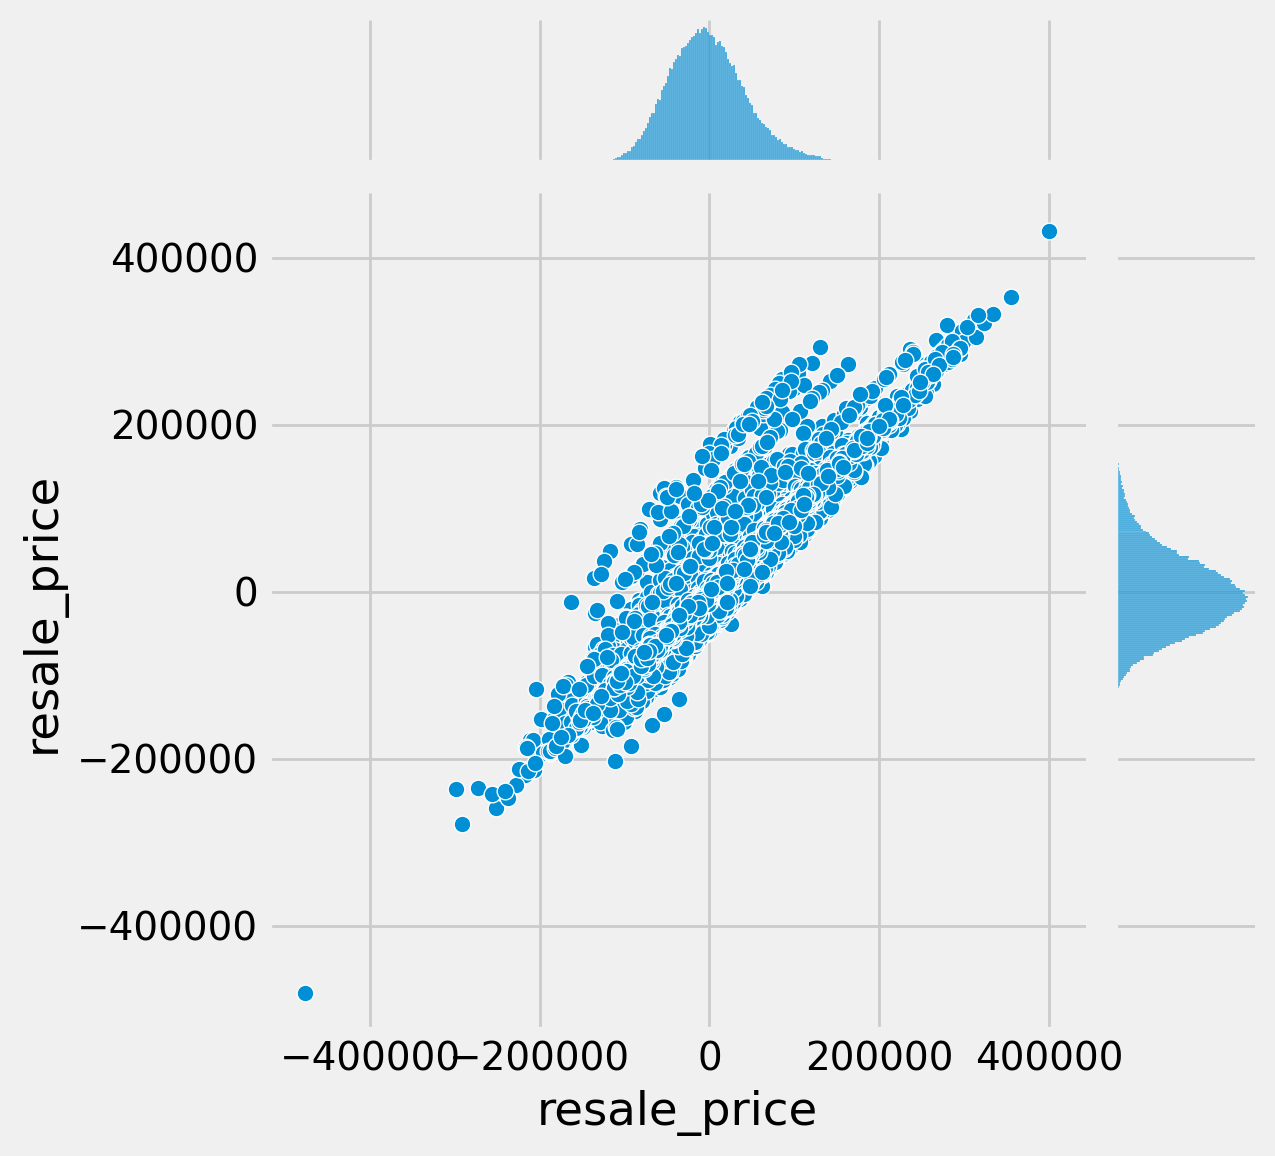

In [91]:
sns.jointplot(x=ridge_resid, y=lasso_resid, kind='scatter') 


### Residuals comparison

The ridge_residual looks more normally distributed